In [99]:
import matplotlib.pyplot as plt
import numpy as np
from XYMC import *
%matplotlib inline
from tqdm import tqdm
from scipy.interpolate import splev, splrep

## 1. Magnetization and vortex density

In [100]:
Ts, M2_T, V_T = np.load('dat/VM2.npy').T
C_T = np.load('dat/C_tot.npy')

In [101]:
# Ts = np.linspace(0.4, 2.2, 40)
TS = np.linspace(0.4, 2.2, 400)

In [102]:
# M2_T = []
# V_T = []
# for T in Ts:
#     M2_T_s = []
#     V_T_s = []
#     for s in tqdm(range(n_sim)):
#         sim = XYMetropolis(lattice_shape=(50,50),
#                               beta=1/T,
#                               J=1,
#                               random_state=None,
#                             initial_state='hot')
#         sim.simulate(10**6)
#         M2_T_s.append(sim.M2)
#         V_T_s.append(sim.Vdensity)
#     M2_T.append(np.mean(M2_T_s))
#     V_T.append(np.mean(V_T_s))

In [103]:
## Calculate spline
M2_T_spline = splev(TS, splrep(Ts, M2_T))
V_T_spline = splev(TS, splrep(Ts, V_T))

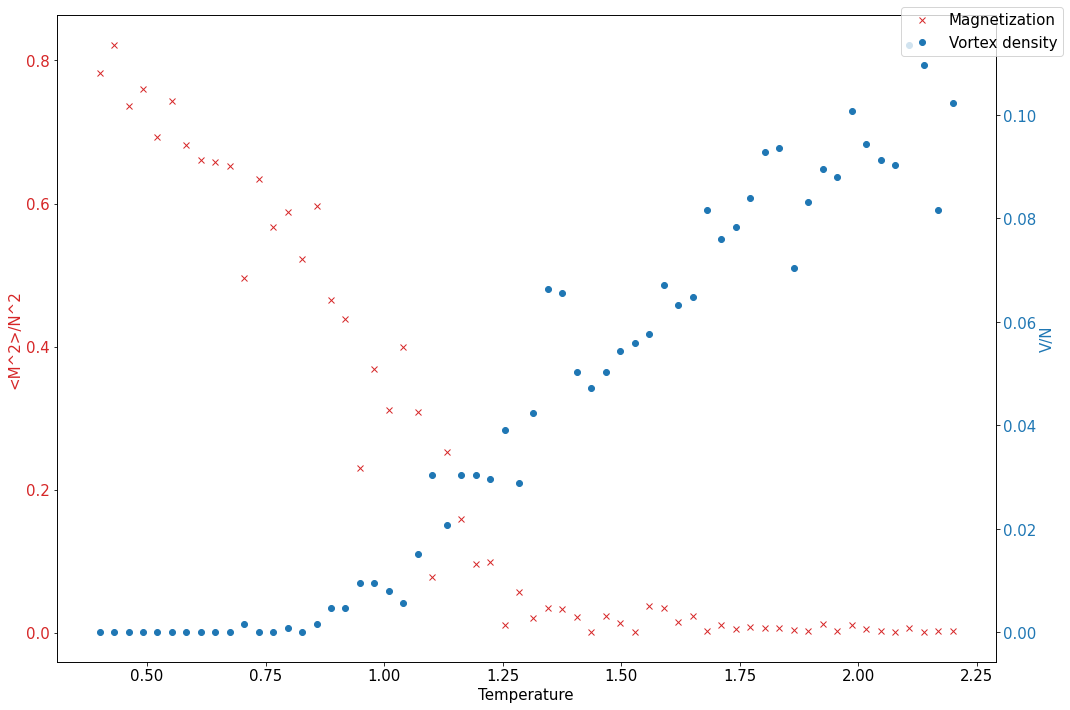

In [109]:
fig, ax1 = plt.subplots(figsize=(15,10))
plt.rcParams.update({'font.size': 15})
color = 'tab:red'
ax1.set_xlabel('Temperature')
ax1.set_ylabel('<M^2>/N^2', color=color)
ax1.plot(Ts, M2_T, color=color,marker='x', label='Magnetization', linestyle='None')
# ax1.plot(TS, M2_T_spline, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('V/N', color=color)  # we already handled the x-label with ax1
ax2.plot(Ts, V_T, color=color,marker='o', label='Vortex density', linestyle='None')
# ax2.plot(TS, V_T_spline, color=color)


ax2.tick_params(axis='y', labelcolor=color)
fig.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig('img/magnetization-vortex.png', transparent=True)

2.2

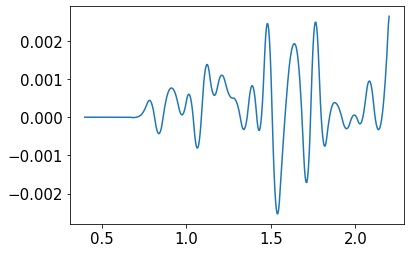

In [90]:
plt.plot(TS, np.gradient(V_T_spline))
TS[np.argmax(np.gradient(V_T_spline))]

## 2. Correlation

In [50]:
#### Temps = [0.01, 1.24, 100]
n_sims=1
C_T = []
for T in Temps:
    sim = XYMetropolis(lattice_shape=(1000,1000),
                          beta=1/T,
                          J=1,
                          random_state=None,
                        initial_state='cold')
    sim.simulate(10**6)
    C_T.append(sim.C)
C_T = np.array(C_T)

KeyboardInterrupt: 

In [92]:
C_T.T.shape

(12, 40)

In [105]:
R = np.arange(C_T.shape[1])
R = np.tile(R, (3,1))[:,1:]

In [118]:
C_T.shape

(60, 12)

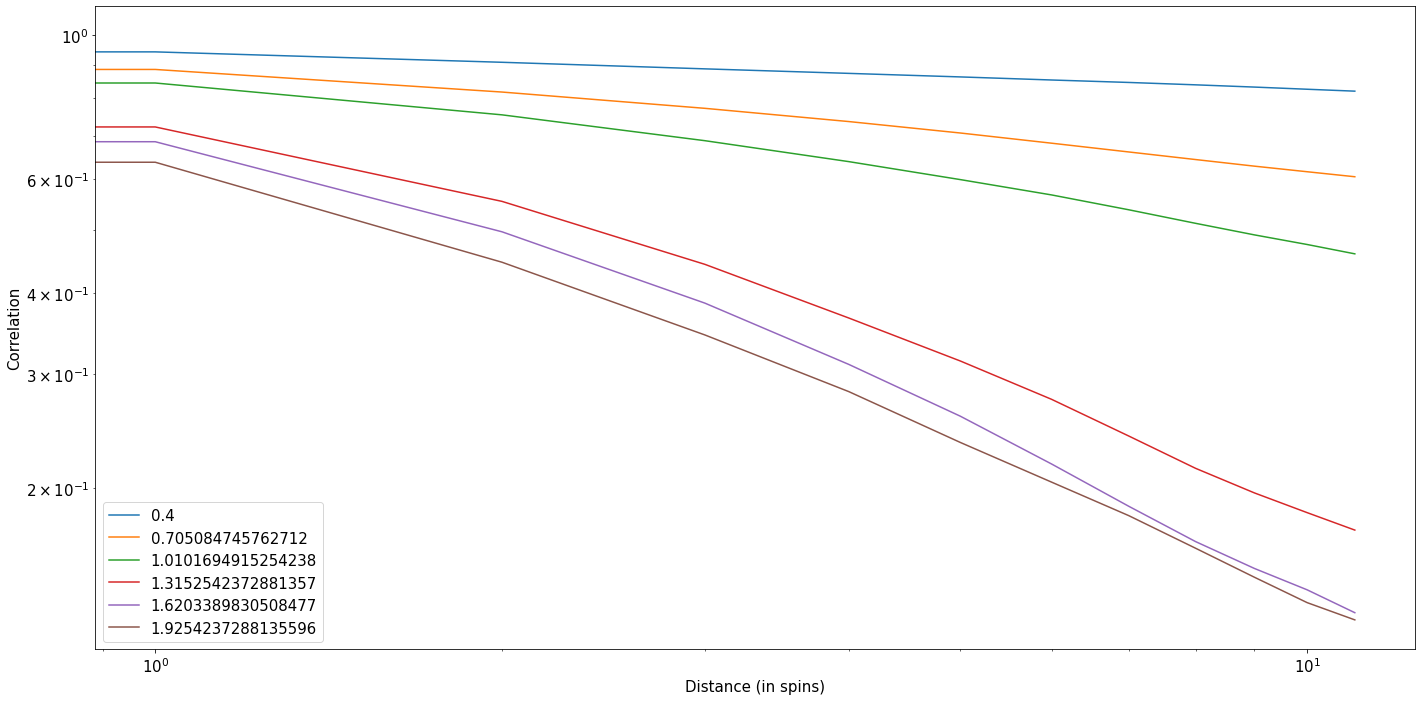

In [129]:
plt.figure(figsize=(20,10))
plt.plot(C_T.T[:,::10]);
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Distance (in spins)')
plt.ylabel('Correlation')
plt.tight_layout()
plt.legend(Ts[::10])
plt.savefig('img/correlators.png', transparent=True)

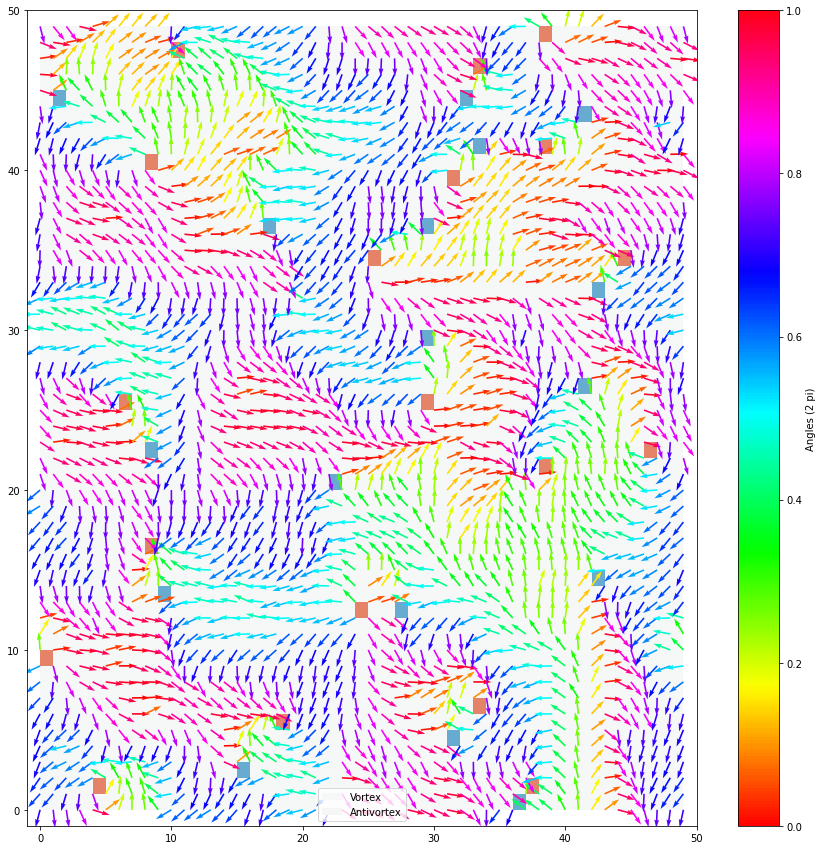

In [7]:
beta = 100
initial_state = 'hot'
filename = str(beta) + '_' + initial_state + '.mp4'
xy = XYMetropolis(lattice_shape=(100,100),
                      beta=beta,
                      J=1,
                      random_state=None,
                initial_state=initial_state)
GetXYAnimation(xy, 1000, 1000, filename)

In [97]:
sim = XYMetropolis(lattice_shape=(50,50),
                              beta=100,
                              J=1,
                              random_state=None,
                            initial_state='hot')
# sim.simulate(10**5)

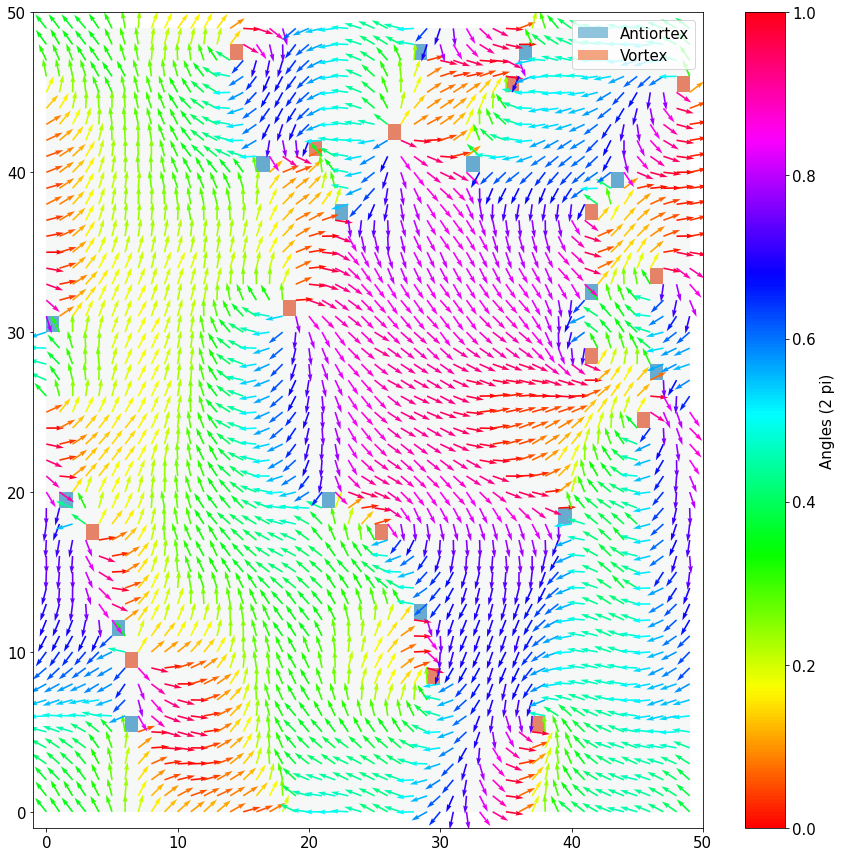

In [98]:
animate(sim, 10**4, 100, 'ani/animation.mp4')